# 1<sup>η</sup> Εργαστηριακή Άσκηση
## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου

<p style='text-align: justify;'> Στην παρούσα άσκηση θα δημιουργηθούν και θα αναλυθούν τοπολογίες, ορισμένες από τις οποίες χρησιμοποιούνται για την αναπαράσταση σύνθετων ή/και κοινωνικών δικτύων. Η ανάλυση θα γίνει μέσω των μετρικών ανάλυσης που παρουσιάστηκαν στις διαλέξεις του μαθήματος. Τα δίκτυα που θα μελετηθούν δίνονται στον Πίνακα 1.</p>

<table width="80%">
    <caption>Πίνακας $1$: Σύνθετα δίκτυα και χαρακτηριστικές παράμετροι</caption>
    <thead>
    <tr>
        <th>Τύπος Δικτύου</th>
        <th>Μοντέλο</th>
        <th>Αναγνωριστικό</th>
        <th>Παράμετροι</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Πλέγμα</td>
            <td style="background-color:#F2F4F7" rowspan="2">Πεπερασμένο</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Bαθμός $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Τυχαίος γραφος</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG (ER)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Συνδέσεις $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Τυχαίος γράφος</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG (G)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Πιθανότητα σύνδεσης $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Τυχαίος γεωμετρικός γράφος</td>
            <td style="background-color:#FFFFFF" rowspan="3">Επίπεδος</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td> 
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Ακτίνα $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF (BA)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Παράμετρος επισύναψης $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW (WS)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Βαθμός αρχικού πλέγματος $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Πιθανότητα ανασύνδεσης $g_p$</td>  
        </tr>
    </tbody>
</table>

In [122]:
seedno = 600    #seed number !DO NOT CHANGE IT!

In [123]:
%matplotlib inline
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

## Α. Κατασκευή και οπτικοποίηση σύνθετων τύπων δικτύου

### Τοπολογία REG για βαθμό πλέγματος $d = 4$

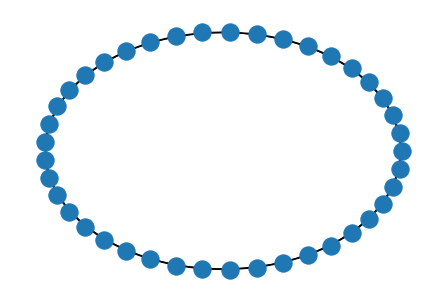

In [124]:
random.seed(seedno)
# Size of network
n = 41
# How many neighbours every node will have
d = 4
# use of watts_strogatz_graph from networkx package
REG = nx.watts_strogatz_graph(n, d, 0, seedno)
# visualization with draw_circular from networkx package
nx.draw_circular(REG)

### Τοπολογία RG (ER) για αριθμό συνδέσεων $M = 150$

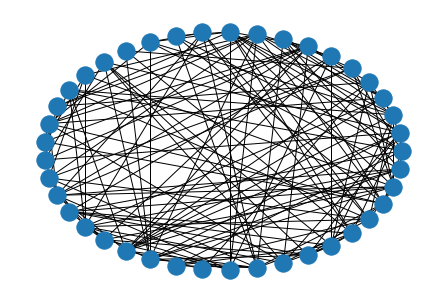

In [125]:
random.seed(seedno)
n = 41 
M = 150

# Construct an RGER with gnm_random_graph from networkx 
RGER = nx.gnm_random_graph(n, M, seedno)
# visualization with draw_circular from networkx
nx.draw_circular(RGER)

### Τοπολογία RGG  με ακτίνα σύνδεσης $R=0.35$

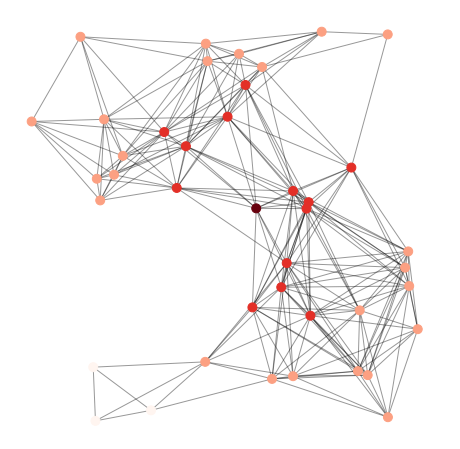

In [126]:
random.seed(seedno)
n = 41
R = 0.35

# Construct an RGG with random_geometric_graph from networkx 
RGG = nx.random_geometric_graph(n, R, seed = seedno)

# visualization: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(RGG, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(RGG, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(RGG, pos, alpha=0.4)
nx.draw_networkx_nodes(
    RGG,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

### Τοπολογία SF με παράμετρο επισύναψης $d=4$

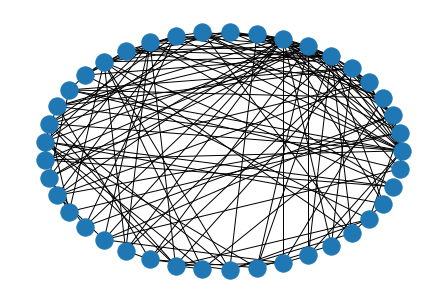

In [127]:
random.seed(seedno)
n = 41
d = 4

# construct SF with barabasi_albert_graph from networkx
SF = nx.barabasi_albert_graph(n, d, seedno)
# visualization with draw_circular from networkx
nx.draw_circular(SF)

### Τοπολογία SW με βαθμό αρχικού πλέγματος $d=4$ και πιθανότητα ανασύνδεσης $p=0.25$

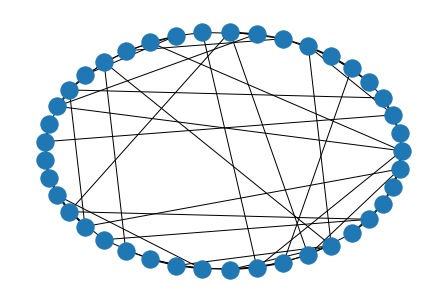

In [128]:
random.seed(seedno)
n = 41
d = 4
p = 0.25

# construct SW with watts_strogatz_graph from networkx
SW = nx.watts_strogatz_graph(n, d, p, seedno)
# visualization with draw_circular from networkx
nx.draw_circular(SW)

## B. Μετρικές δικτύου

#### Προσθήκη όλων των γράφων με τα ονόματα σε μια λίστα απο tuples

In [129]:
graph_pairs = [(REG, "REG"), (RGER, "RGER"), (RGG, "RGG"), (SF, "SF"), (SW, "SW")]

### B1. Συντελεστής ομαδοποίησης (Clustering coefficient)

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β1.1 Να υπολογιστεί ο συντελεστής ομαδοποίησης κάθε κόμβου και να αναπαρασταθεί η κατανομή του.
#### Β1.2  Να υπολογιστεί ο μέσος συντελεστής ομαδοποίησης και η διασπορά του.
#### Β.1.3 Να βρεθούν οι κόμβοι με το μικρότερο και το μεγαλύτερο συντελεστή ομαδοποίησης. 

(B.1.2) REG
	Avg Clustering Coefficient for REG: 0.5
	Var of Clustering Coefficients for REG: 0.0
(B.1.3) REG
	Min CC Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
	Max cc Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
(B.1.2) RGER
	Avg Clustering Coefficient for RGER: 0.2056998556998557
	Var of Clustering Coefficients for RGER: 0.025705280477215858
(B.1.3) RGER
	Min CC Nodes: [14, 18, 29]
	Max cc Nodes: [30]
(B.1.2) RGG
	Avg Clustering Coefficient for RGG: 0.7221574814472949
	Var of Clustering Coefficients for RGG: 0.01703839982169533
(B.1.3) RGG
	Min CC Nodes: [28]
	Max cc Nodes: [7, 8]
(B.1.2) SF
	Avg Clustering Coefficient for SF: 0.2332169822844142
	Var of Clustering Coefficients for SF: 0.01547681647977665
(B.1.3) SF
	Min CC Nodes: [24, 37]
	Max cc Node

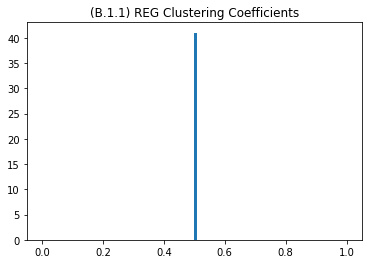

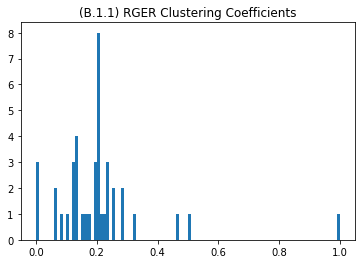

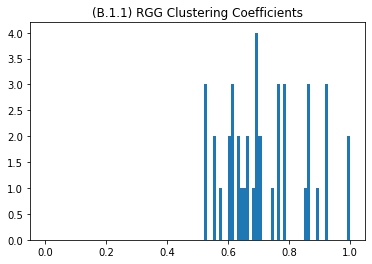

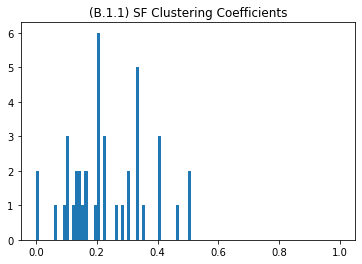

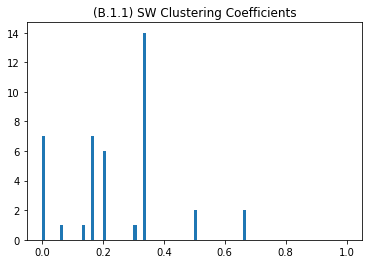

In [130]:
# Function that uses networkx built in functions to calculate clustering coefficients
# and avg clustering coefficient (for B1.2)
def cc_and_avgcc(G):
    return (nx.clustering(G), nx.average_clustering(G))

# Function that outputs the Distribution plot for each Clustering Coefficients dictionary
def printDistrubtion(Gcc, _title, _bins):
    plt.figure()
    plt.title(_title)
    plt.hist(list(Gcc.values()), range = (0, 1), bins = _bins)

def showResults(G, _name):
    # get cc and avg cc
    (Gcc, Gavgcc) = cc_and_avgcc(G)
    # print distr plot for Gcc
    printDistrubtion(Gcc,"(B.1.1) " + _name + " Clustering Coefficients", 100)
    # Convert Gcc dictionary to array (for std)
    Gcc_arr = np.array(list(Gcc.values()))
    # Print avg cc
    print("(B.1.2) " + _name)
    print("\tAvg Clustering Coefficient for " + _name + ":", Gavgcc)
    # Print var
    print("\tVar of Clustering Coefficients for " + _name + ":", np.var(Gcc_arr))
    # Find nodes with the min/max cc
    print("(B.1.3) " + _name)
    minCC_Nodes = [k for k,v in Gcc.items() if v == np.amin(Gcc_arr)]
    print("\tMin CC Nodes:", minCC_Nodes)
    maxCC_Nodes = [k for k,v in Gcc.items() if v == np.amax(Gcc_arr)]
    print("\tMax cc Nodes:", maxCC_Nodes)

for (g, name) in graph_pairs:
    showResults(g, name)

### Β2. Μέσο μήκος μονοπατιού - Διάμετρος - Ακτίνα γράφου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β2.1 Nα υπολογιστεί το μέσο μήκος μονοπατιού και η διασπορά του. Προτείνεται η χρήση της συνάρτησης  all_pairs_shortest_path_length του networkx.
#### B2.2 Να υπολογιστεί η διάμετρος (συνάρτηση diameter) και η ακτίνα (συνάρτηση radius).
#### Για τα παραπάνω πραγματοποιήστε συγκρίσεις και εξηγήστε με βάση τα χαρακτηριστικά της κάθε τοπολογίας όπως παρουσιάζονται στη θεωρία.

In [131]:
def compute_path_lengths(G):
    return dict(nx.all_pairs_shortest_path_length(G))

def showResults(_paths, _name, _g):
    print("(B.2.1) " + _name)
    print("\tMean path length of " + _name + " is:", np.mean(_paths))
    print("\tVariance of path length of " + _name + " is:", np.var(_paths))
    print("(B.2.2) " + _name)
    print("\tThe diameter of " + _name + " is:", nx.diameter(_g))
    print("\tThe radius of " + _name + " is:", nx.radius(_g))

for (g, name) in graph_pairs:
    paths = compute_path_lengths(g)
    # https://stackoverflow.com/questions/6027558/flatten-nested-dictionaries-compressing-keys
    # normalize the dictionary (convert it from 2d to 1d)
    flattened_paths = pd.json_normalize(paths, sep = "_").to_dict(orient = "records")[0]
    showResults(np.array(list(flattened_paths.values())), name, g)

(B.2.1) REG
	Mean path length of REG is: 5.365853658536586
	Variance of path length of REG is: 8.76859012492564
(B.2.2) REG
	The diameter of REG is: 10
	The radius of REG is: 10
(B.2.1) RGER
	Mean path length of RGER is: 1.9702558001189767
	Variance of path length of RGER is: 0.4774020166602909
(B.2.2) RGER
	The diameter of RGER is: 4
	The radius of RGER is: 3
(B.2.1) RGG
	Mean path length of RGG is: 2.1951219512195124
	Variance of path length of RGG is: 1.1885782272456873
(B.2.2) RGG
	The diameter of RGG is: 5
	The radius of RGG is: 3
(B.2.1) SF
	Mean path length of SF is: 1.950029744199881
	Variance of path length of SF is: 0.4484250437315824
(B.2.2) SF
	The diameter of SF is: 4
	The radius of SF is: 2
(B.2.1) SW
	Mean path length of SW is: 2.826888756692445
	Variance of path length of SW is: 1.2032270245077346
(B.2.2) SW
	The diameter of SW is: 5
	The radius of SW is: 4


#### B.2.3 Για κάθε τοπολογία, ποιος κόμβος συνδέεται με τους περισσότερους κόμβους με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο της τοπολογίας?

In [132]:
def find_nodes(_pathLengths, _diameter):
    # keep how many shortest paths to every other node == diameter each node has
    shortest_paths_eq_diam_num = {}
    # keep the destination(s) of the above path(s) each node has
    shortest_paths_eq_diam_info = {}
    for node in range (len(_pathLengths)):
        shortest_paths_eq_diam_num[node] = sum(1 for v in _pathLengths[node].values() if v == _diameter)
        shortest_paths_eq_diam_info[node] = [k for k, v in _pathLengths[node].items() if v == _diameter]
    
    # keep only the nodes which have the most shortest paths to every other node == diameter
    keys_to_keep = [k for k, v in shortest_paths_eq_diam_num.items() if v == max(shortest_paths_eq_diam_num.values())]
    
    # construct a new dictionary based on shortest_paths_eq_diam_info and keys_to_keep
    # the new dictionary contains whatever the shortest_paths_eq_diam_info contains but 
    # all keys which does not exist in keys_to_keep are not included
    return {k: shortest_paths_eq_diam_info[k] for k in keys_to_keep if k in shortest_paths_eq_diam_info}

print("(B.2.3)")
for (g, name) in graph_pairs:
    shortest_paths_eq_diam_info = find_nodes(compute_path_lengths(g), nx.diameter(g))
    print("\t" + name + ":", shortest_paths_eq_diam_info)

(B.2.3)
	REG: {0: [19, 20, 21, 22], 1: [20, 21, 22, 23], 2: [21, 22, 23, 24], 3: [22, 23, 24, 25], 4: [23, 24, 25, 26], 5: [24, 25, 26, 27], 6: [25, 26, 27, 28], 7: [26, 27, 28, 29], 8: [27, 28, 29, 30], 9: [28, 29, 30, 31], 10: [32, 29, 30, 31], 11: [32, 33, 30, 31], 12: [32, 33, 34, 31], 13: [32, 33, 34, 35], 14: [33, 34, 35, 36], 15: [34, 35, 36, 37], 16: [35, 36, 37, 38], 17: [36, 39, 38, 37], 18: [37, 38, 40, 39], 19: [0, 38, 39, 40], 20: [0, 1, 39, 40], 21: [0, 1, 2, 40], 22: [0, 1, 2, 3], 23: [1, 2, 3, 4], 24: [2, 3, 4, 5], 25: [3, 4, 5, 6], 26: [4, 5, 6, 7], 27: [5, 6, 7, 8], 28: [6, 7, 8, 9], 29: [7, 8, 9, 10], 30: [8, 9, 10, 11], 31: [9, 10, 11, 12], 32: [10, 11, 12, 13], 33: [11, 12, 13, 14], 34: [12, 13, 14, 15], 35: [13, 14, 15, 16], 36: [14, 15, 16, 17], 37: [15, 16, 17, 18], 38: [16, 17, 18, 19], 39: [17, 18, 19, 20], 40: [18, 19, 20, 21]}
	RGER: {14: [20, 30]}
	RGG: {7: [1, 5, 19, 36, 39], 8: [1, 5, 19, 36, 39], 34: [1, 5, 19, 36, 39]}
	SF: {25: [37], 37: [25]}
	SW: {36

#### Περιφέρεια του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με τη διάμετρό του. 
#### Κέντρο του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με την ακτίνα του.  
#### Β.2.4 Για κάθε τοπολογία, να βρεθεί η περιφέρεια και το κέντρο της και να σχολιαστούν τα αποτελέσματα.

In [133]:
def find_periphery(G):
    return [k for k, v in nx.eccentricity(G).items() if v == nx.diameter(G)]

def find_center(G):
    return [k for k, v in nx.eccentricity(G).items() if v == nx.radius(G)]

print("(B.2.4)")
for (g, name) in graph_pairs:
    print("\tPeriphery for " + name + ":\n\t", find_periphery(g))
    print("\tCenter for " + name + ":\n\t", find_center(g))

(B.2.4)
	Periphery for REG:
	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
	Center for REG:
	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
	Periphery for RGER:
	 [14, 20, 30]
	Center for RGER:
	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
	Periphery for RGG:
	 [1, 5, 7, 8, 19, 34, 36, 39]
	Center for RGG:
	 [4, 6, 12, 15, 16, 21, 25, 31, 35, 40]
	Periphery for SF:
	 [25, 37]
	Center for SF:
	 [0, 6, 7, 13, 15]
	Periphery for SW:
	 [2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 26, 27, 28, 35, 36, 37, 38, 39]
	Center for SW:
	 [0, 1, 7, 8, 9, 17, 18, 21, 23, 24, 25, 29, 30, 31, 32, 33, 34, 40]


## Γ) Mετρικές κεντρικότητας κόμβων

### Γ1. Κεντρικότητα βαθμού (Degree centrality)
##### Γ1.1 Να αναπαρασταθεί η κατατανομή βαθμών κόμβων για κάθε τοπολογία.
##### Γ1.2 Να υπολογιστεί ο μέσος βαθμός κόμβου καθώς και η διασπορά των βαθμών κόμβου για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

(C.1.2)
	Mean Node Degree for REG: 0.09999999999999999
	Variance of Node Degree for REG: 1.925929944387236e-34
	Mean Node Degree for RGER: 0.1829268292682927
	Variance of Node Degree for RGER: 0.003610945865556217
	Mean Node Degree for RGG: 0.2878048780487805
	Variance of Node Degree for RGG: 0.011070791195716835
	Mean Node Degree for SF: 0.1804878048780488
	Variance of Node Degree for SF: 0.009283908387864368
	Mean Node Degree for SW: 0.10000000000000002
	Variance of Node Degree for SW: 0.0006402439024390246


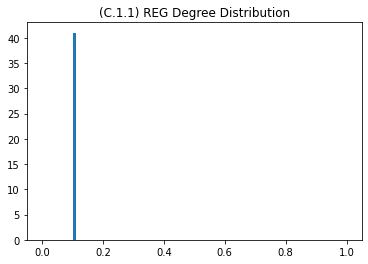

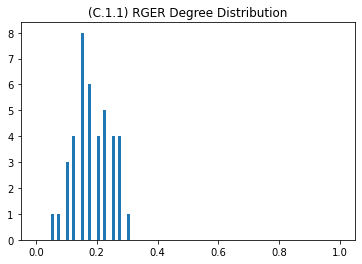

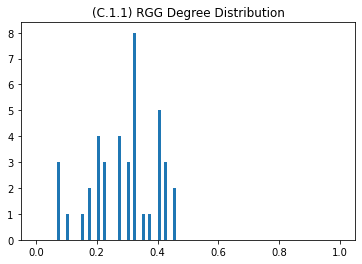

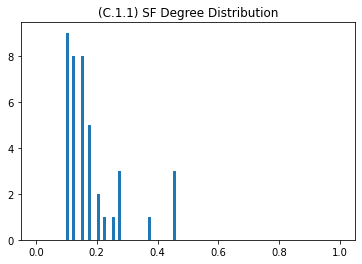

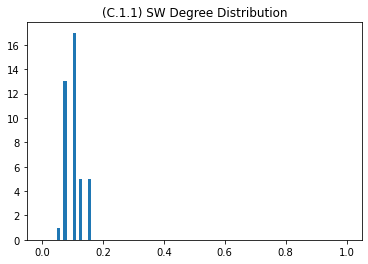

In [134]:
def find_degree(G):
    return dict(nx.degree_centrality(G))

def plotDegreeDistribution(degree, _title, _bins):
    plt.figure()
    plt.title(_title)
    plt.hist(list(degree.values()), range = (0, 1), bins = _bins)

print("(C.1.2)")
for (g, name) in graph_pairs:
    degree = find_degree(g)
    plotDegreeDistribution(degree, "(C.1.1) " + name + " Degree Distribution", 100)
    print("\tMean Node Degree for " + name + ":", np.mean(np.array(list(degree.values()))))
    print("\tVariance of Node Degree for " + name + ":", np.var(np.array(list(degree.values()))))
    

### Γ2. Κεντρικότητα εγγύτητας (Closeness centrality)
##### Γ2.1 Να αναπαρασταθεί η κατατανομή της εγγύτητας κόμβων για κάθε τοπολογία.
##### Γ2.2 Να υπολογιστεί η μέση εγγύτητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

(C.2.2)
	Mean Closeness Centrality for REG: 0.18181818181818182
	Variance of Closeness Centrality for REG: 0.0
	Mean Closeness Centrality for RGER: 0.49933655416418743
	Variance of Closeness Centrality for RGER: 0.0019690386176425753
	Mean Closeness Centrality for RGG: 0.4584425362347132
	Variance of Closeness Centrality for RGG: 0.006118563562728204
	Mean Closeness Centrality for SF: 0.5061083038622144
	Variance of Closeness Centrality for SF: 0.00321902605388673
	Mean Closeness Centrality for SW: 0.3481192472757349
	Variance of Closeness Centrality for SW: 0.0010656629277172372


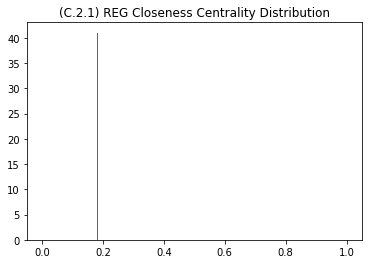

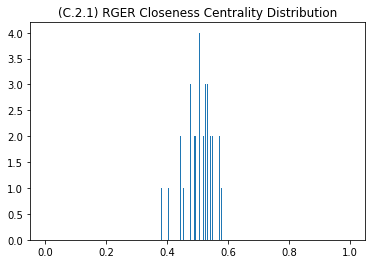

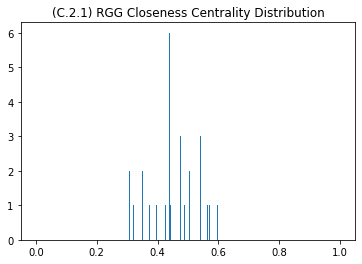

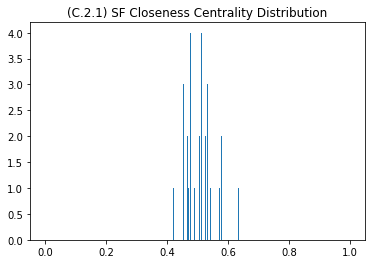

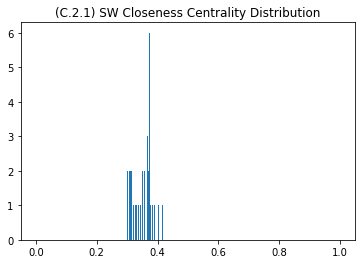

In [135]:
def find_closeness(G):
    return nx.closeness_centrality(G)

def plotClosenessDistribution(closeness, _title, _bins):
    plt.figure()
    plt.title(_title)
    plt.hist(list(closeness.values()), range = (0, 1), bins = _bins)

print("(C.2.2)")
for (g, name) in graph_pairs:
    closeness = find_closeness(g)
    plotClosenessDistribution(closeness, "(C.2.1) " + name + " Closeness Centrality Distribution", 400)
    print("\tMean Closeness Centrality for " + name + ":", np.mean(np.array(list(closeness.values()))))
    print("\tVariance of Closeness Centrality for " + name + ":", np.var(np.array(list(closeness.values()))))

### Γ3. Ενδιαμεσική κεντρικότητα (Betweenness centrality)
##### Γ3.1 Να αναπαρασταθεί η κατατανομή της ενδιαμεσικής κεντρικότητας κόμβων για κάθε τοπολογία.
##### Γ3.2 Να υπολογιστεί η μέση ενδιαμεσική κεντρικότητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

(C.3.2)
	Mean Betweenness Centrality for REG: 0.11538461538461536
	Variance of Betweenness Centrality for REG: 3.0063296692873927e-34
	Mean Betweenness Centrality for RGER: 0.026141338336460287
	Variance of Betweenness Centrality for RGER: 0.00037342749642633587
	Mean Betweenness Centrality for RGG: 0.032051282051282055
	Variance of Betweenness Centrality for RGG: 0.0014506695485798724
	Mean Betweenness Centrality for SF: 0.025609756097560978
	Variance of Betweenness Centrality for SF: 0.0010493711577753131
	Mean Betweenness Centrality for SW: 0.04865540963101938
	Variance of Betweenness Centrality for SW: 0.0012949681477673028


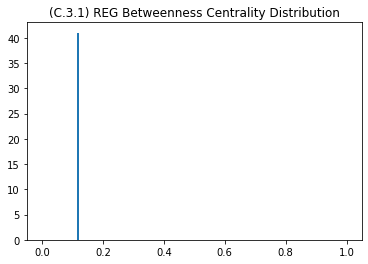

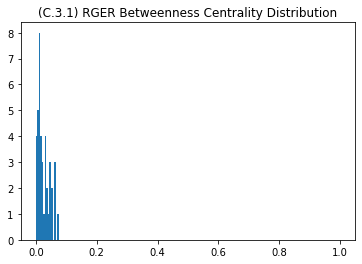

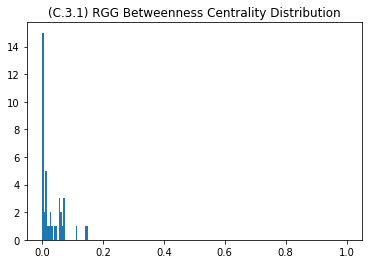

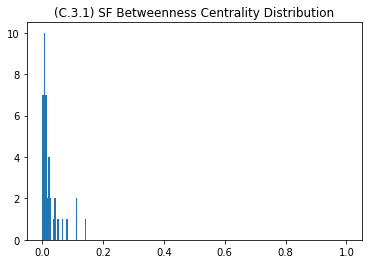

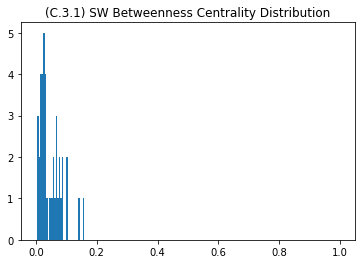

In [136]:
def find_betweenness(G):
    return nx.betweenness_centrality(G)

def plotBetweennessDistribution(betweenness, _title, _bins):
    plt.figure()
    plt.title(_title)
    plt.hist(list(betweenness.values()), range = (0, 1), bins = _bins)

print("(C.3.2)")
for (g, name) in graph_pairs:
    betweenness = find_betweenness(g)
    plotBetweennessDistribution(betweenness, "(C.3.1) " + name + " Betweenness Centrality Distribution", 200)
    print("\tMean Betweenness Centrality for " + name + ":", np.mean(np.array(list(betweenness.values()))))
    print("\tVariance of Betweenness Centrality for " + name + ":", np.var(np.array(list(betweenness.values()))))

### Γ4. Kεντρικότητα Katz
##### Γ4.1 Να αναπαρασταθεί η κατανομή της κεντρικότητας Katz των κόμβων για κάθε τοπολογία. 
Για τον προσδιορισμό της παραμέτρου $alpha$ της συνάρτησης katz_centrality,  να υπολογιστεί η μεγαλύτερη ιδιοτιμή $λ_{max}$ του πίνακα γειτνίασης με τη συνάρτηση adjacency_spectrum του networkx. 
H $alpha$ ορίζεται να είναι ιση με $\frac{1}{λ_{max}}-0.01$.
##### Γ4.2 Να υπολογιστεί η μέση  κεντρικότητα Katz  καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

(C.4.2)
	Mean Katz Centrality for REG: 0.15617376188860602
	Variance of Katz Centrality for REG: 0.0
	Mean Katz Centrality for RGER: 0.15004094207199936
	Variance of Katz Centrality for RGER: 0.0018779596045859516
	Mean Katz Centrality for RGG: 0.14464680256763546
	Variance of Katz Centrality for RGG: 0.0034675464093985057
	Mean Katz Centrality for SF: 0.1426086346965943
	Variance of Katz Centrality for SF: 0.004053021212412341
	Mean Katz Centrality for SW: 0.1494236148359392
	Variance of Katz Centrality for SW: 0.002062827231799909


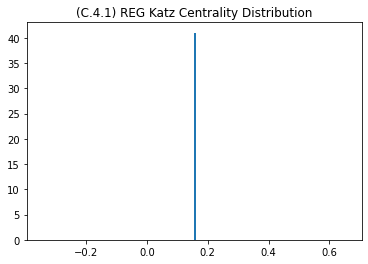

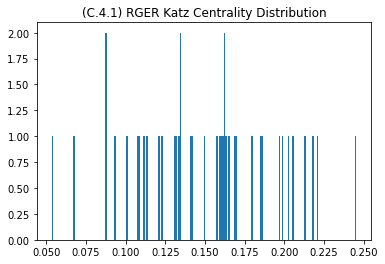

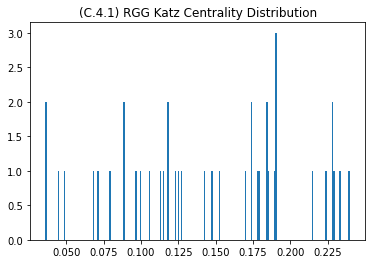

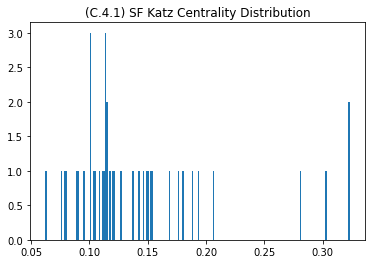

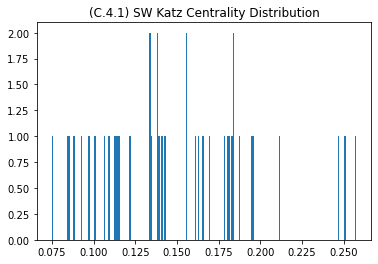

In [137]:
def find_katz(G):
    return nx.katz_centrality(G, alpha = (1 / (nx.adjacency_spectrum(G).max()) - 0.01).real)

def plotKatzDistribution(katz, _title, _bins):
    plt.figure()
    plt.title(_title)
    plt.hist(list(katz.values()), bins = _bins)

print("(C.4.2)")
for (g, name) in graph_pairs:
    katz = find_katz(g)
    plotKatzDistribution(katz, "(C.4.1) " + name + " Katz Centrality Distribution", 200)
    print("\tMean Katz Centrality for " + name + ":", np.mean(np.array(list(katz.values()))))
    print("\tVariance of Katz Centrality for " + name + ":", np.var(np.array(list(katz.values()))))

#### Να προσδιοριστούν, για κάθε τοπολογία, οι πιο κεντρικοί κόμβοι ως προς το βαθμό, την εγγύτητα, την ενδιαμεσική κεντρικότητα και την κεντρικότητα Katz. Να σχολιαστούν τα αποτελέσματα.

In [138]:
def find_central(G, name):
    print("Central Nodes - " + name + ":")
    degree = find_degree(G)
    closeness = find_closeness(G)
    betweenness = find_betweenness(G)
    katz = find_katz(G)
    central_nodes_degree = { k for k, v in degree.items() if v == max(degree.values()) }
    print("\tAs per degree:", central_nodes_degree)
    central_nodes_closeness = { k for k, v in closeness.items() if v == max(closeness.values()) }
    print("\tAs per closeness:", central_nodes_closeness)
    central_nodes_betweenness = { k for k, v in betweenness.items() if v == max(betweenness.values()) }
    print("\tAs per betweenness:", central_nodes_betweenness)
    central_nodes_katz = { k for k, v in katz.items() if v == max(katz.values()) }
    print("\tAs per katz:", central_nodes_katz)

print("(C.4.3)")
for (g, name) in graph_pairs:
    find_central(g, name)

(C.4.3)
Central Nodes - REG:
	As per degree: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
	As per closeness: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
	As per betweenness: {0, 1, 2, 3, 4, 33, 34, 35, 36, 39, 40, 11}
	As per katz: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
Central Nodes - RGER:
	As per degree: {1}
	As per closeness: {1}
	As per betweenness: {27}
	As per katz: {1}
Central Nodes - RGG:
	As per degree: {40, 15}
	As per closeness: {15}
	As per betweenness: {15}
	As per katz: {15}
Central Nodes - SF:
	As per degree: {0, 8, 6}
	As per closeness: {0, 6}
	As per betweenness: {8}
	As per katz: {0}
Central Nodes - SW:
	As per degree: {0, 32, 40, 17, 2

### Γ5. Αλγόριθμος PageRank σε πραγματικό δίκτυο
#####  Να εκτελεστεί ο αλγόριθμος pagerank στην τεσσαρακοστή (40η) μεγαλύτερη συνδεδεμένη συνιστώσα του κατευθυνόμενου δίκτυου web-Stanford του οποίου οι ακμές δίνονται στο αρχείο web-Standord.txt. 
##### Για να υπολογίσετε τις συνδεδεμένες συνιστώσες, χρησιμοποιήστε τη συνάρτηση weakly_connected_components του networkx.
Περισσότερες πληροφορίες για το dataset δίνονται στο link https://snap.stanford.edu/data/web-Stanford.html.
##### Να σχολιαστούν τα αποτελέσματα.

In [139]:
G_web = nx.read_edgelist("web-Stanford.txt", create_using = nx.DiGraph())

#find the 40th largest weakly connected component of the graph web-Stanford
G_weakly = nx.weakly_connected_components(G_web)
weakly_connected_components = sorted(G_weakly, key = len,reverse = True)
G40 = weakly_connected_components[40]

pagerank = nx.pagerank(G_web.subgraph(G40))

### Δ) Μελέτη συνεκτικότητας και ευρωστία (robustness) δικτύων 

### Δ1. Μελέτη συνεκτικότητας
Για κάθε τύπο σύνθετου δικτύου, ορίζεται το ποσοστό συνεκτικότητας για έναν αριθμό παραγόμενων τοπολογιών, ως κλάσμα των συνδεδεμένων τοπολογιών σε σχέση με τον αριθμό όλων των παραγόμενων τοπολογιών.

Με βάση τις τιμές παραμέτρων του Πίνακα 2, μελετήστε τη συνεκτικότητα κάθε τύπου σύνθετου δικτύου του Πίνακα 1.

<table>
    <thead>
        <tr>
            <th>Τοπολογία</th>
            <th>Εύρος Παραμέτρων</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ με βήμα $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ με βήμα $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ με βήμα $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ με βήμα $2$ και $g_p \in [0.1,0.7]$ με βήμα $0.1$</td>
        </tr>
    </tbody>
    <caption>Πίνακας 2</caption>
</table>

#### Δ1.1 Για κάθε έναν τύπο δικτύου, να παράξετε 100 διαφορετικές τοπολογίες και να παρουσιάσετε το διάγραμμα ποσοστού συνεκτικότητας σε σχέση με τις καθορισμένες παραμέτρους κάθε δικτύου.
#### Δ1.2 Σε ποιες περιπτώσεις εμφανίζονται φαινόμενα κατωφλίου;
#### Δ1.3 Ποιες είναι οι κρίσιμες τιμές για κάθε τύπο δικτύου οι οποίες οδηγούν σε μετάβαση φάσης (phase transitions);
#### Δ1.4 Ποιες μεταβάσεις φάσης είναι απότομες (sharp) και ποιες ομαλές (smooth);

In [140]:
# Function that outputs the Distribution plot for each connectivity result
def printConnDistribution(data, xlabel):
    names = list(data.keys())
    values = list(data.values())

    _, ax = plt.subplots(figsize = (25, 10))
    ax.bar(np.arange(len(names)), values, 0.4)
    ax.set_ylabel('Connectivity (%)')
    ax.set_xlabel(xlabel)
    ax.set_title('Connectivity (%) for every combination of variables')
    ax.set_xticks(np.arange(len(names)), names)
    plt.xticks(rotation = 45)
    plt.show()

Connectivity REG


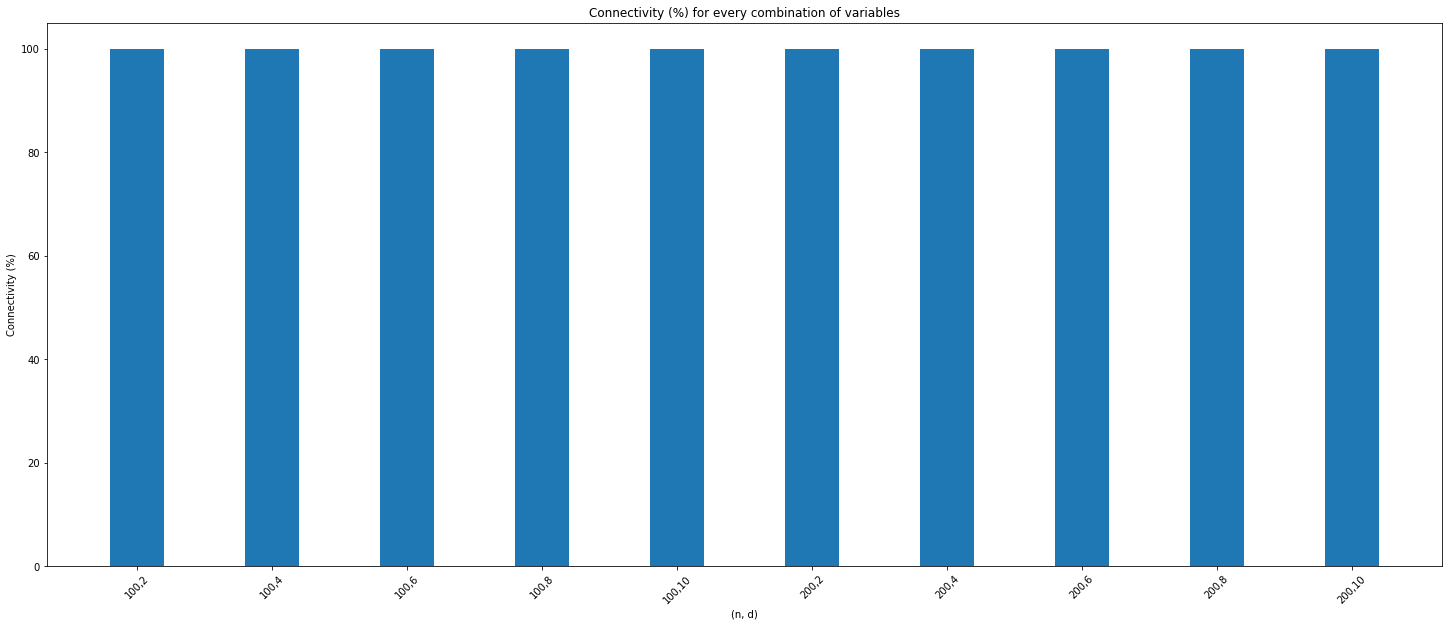

In [141]:
print("Connectivity REG")

connectivity_REG_data = {}

for n in range (100, 300, 100):
    for d in range (2, 12, 2):
        for i in range (0, 100):
            if nx.is_connected(nx.watts_strogatz_graph(n, d, 0)):
                connectivity_REG_data[str(n) + "," + str(d)] = connectivity_REG_data.get(str(n) + "," + str(d), 0) + 1

printConnDistribution(connectivity_REG_data, "(n, d)")
            

Connectivity RG Erdos-Renyi


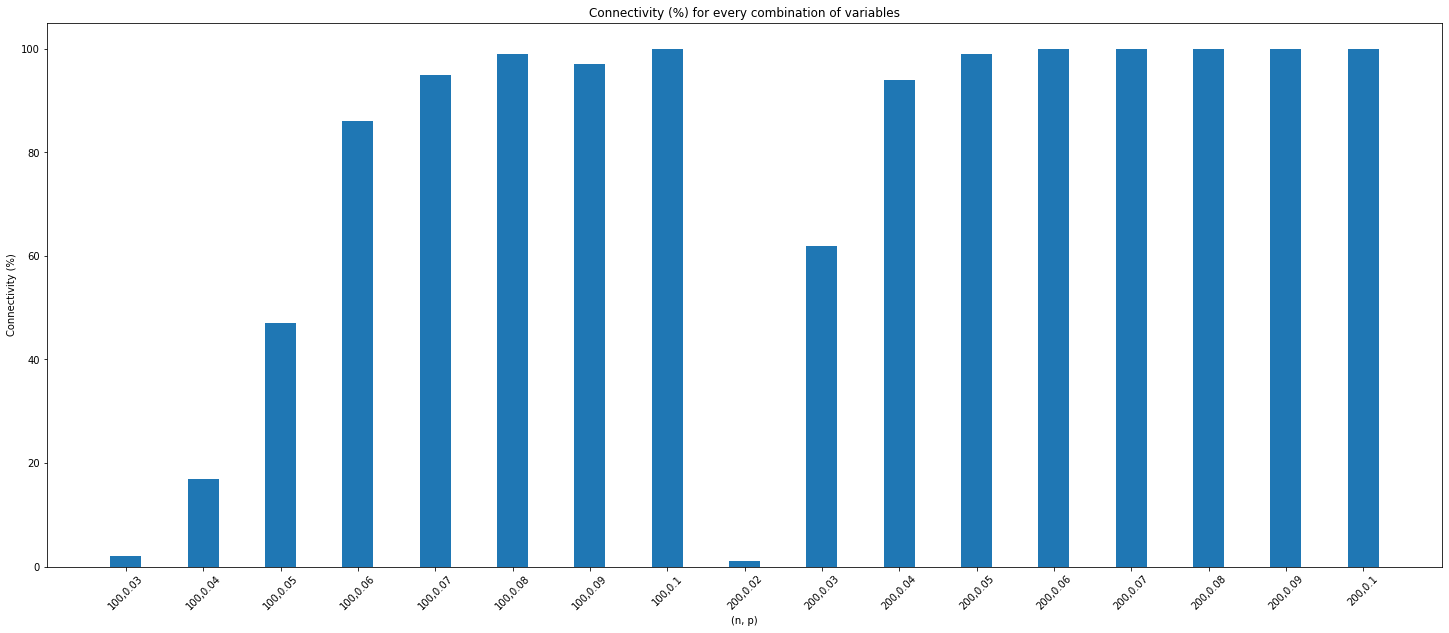

In [142]:
print("Connectivity RG Erdos-Renyi")

connectivity_RGER_data = {}

for n in range (100, 300, 100):
    for p in range (1, 11, 1):
        for i in range (0, 100):
            if nx.is_connected(nx.gnp_random_graph(n, p / 100)):
                connectivity_RGER_data[str(n) + "," + str(p / 100)] = connectivity_RGER_data.get(str(n) + "," + str(p / 100), 0) + 1

printConnDistribution(connectivity_RGER_data, "(n, p)")

Connectivity RG Gilbert


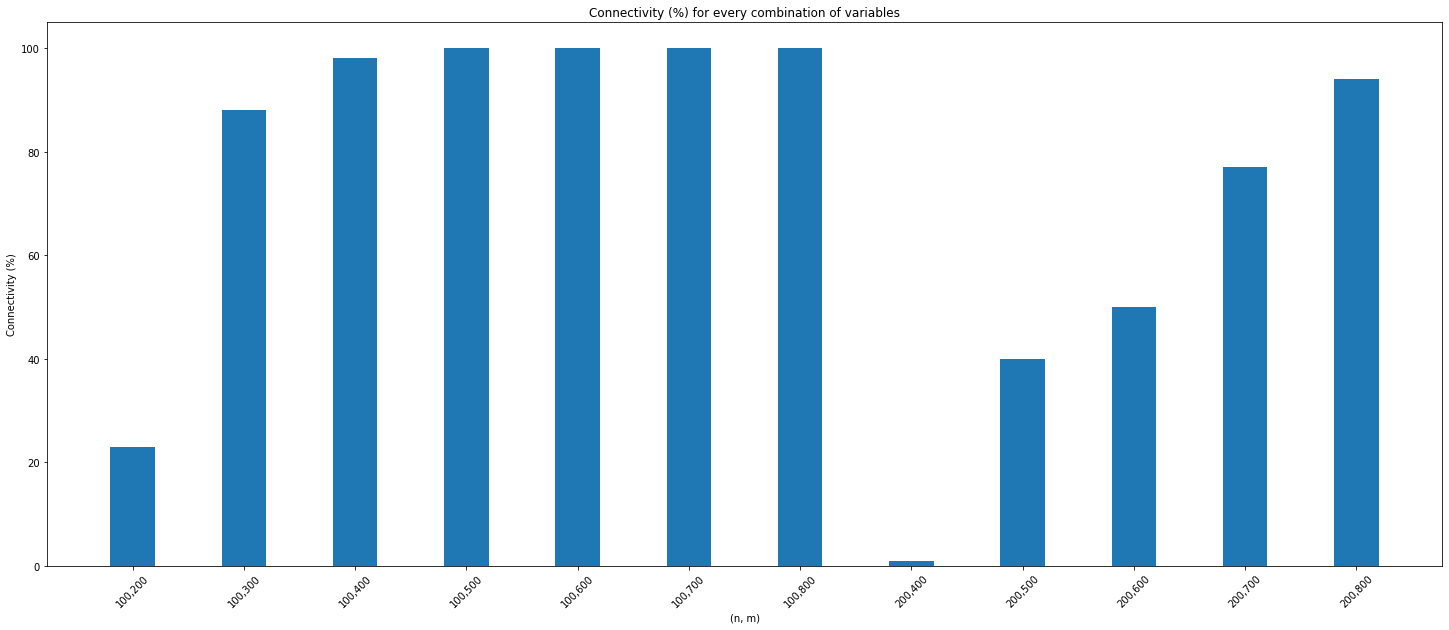

In [143]:
print("Connectivity RG Gilbert")

connectivity_RG_GILB_data = {}

for n in range (100, 300, 100):
    for m in range (100, 900, 100):
        for i in range (0, 100):
            if nx.is_connected(nx.gnm_random_graph(n, m)):
                connectivity_RG_GILB_data[str(n) + "," + str(m)] = connectivity_RG_GILB_data.get(str(n) + "," + str(m), 0) + 1

printConnDistribution(connectivity_RG_GILB_data, "(n, m)")

Connectivity RGG


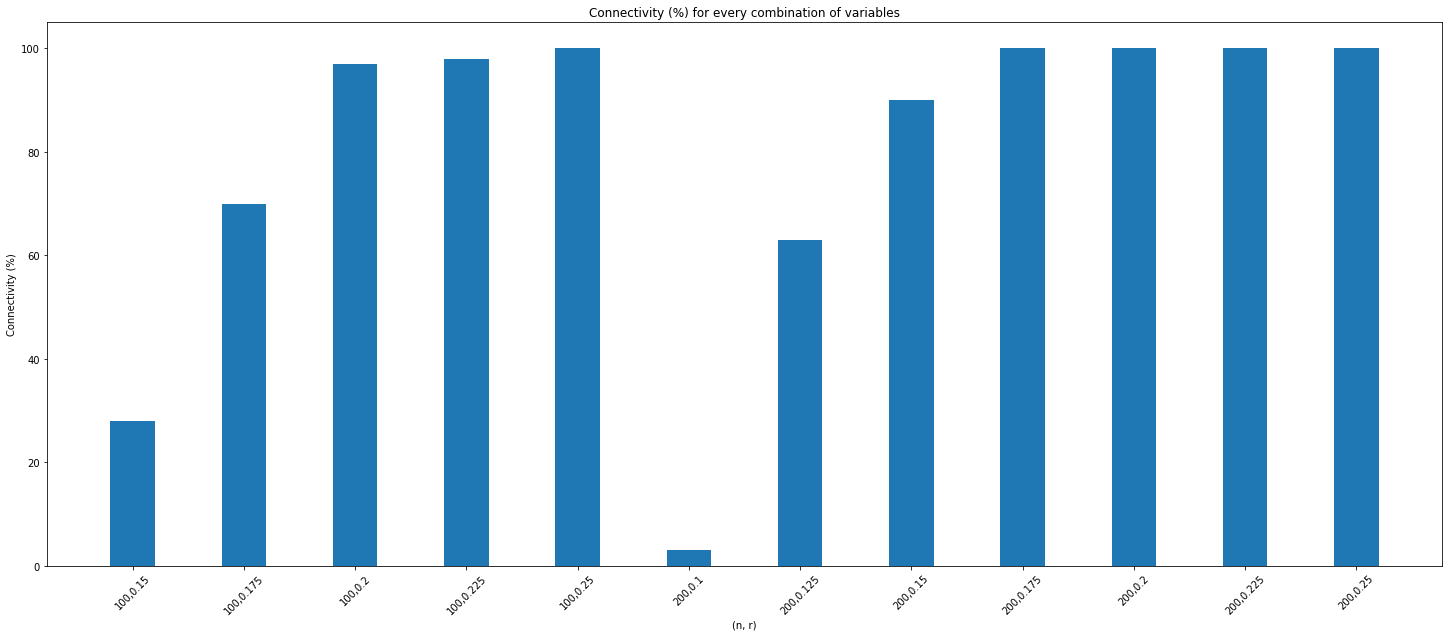

In [144]:
print("Connectivity RGG")

connectivity_RGG_data = {}

for n in range (100, 300, 100):
    for r in range(25, 275, 25):
        for i in range (0, 100):
            if nx.is_connected(nx.random_geometric_graph(n, (r / 1000))):
                connectivity_RGG_data[str(n) + "," + str((r / 1000))] = connectivity_RGG_data.get(str(n) + "," + str((r / 1000)), 0) + 1

printConnDistribution(connectivity_RGG_data, "(n, r)")


Connectivity SF


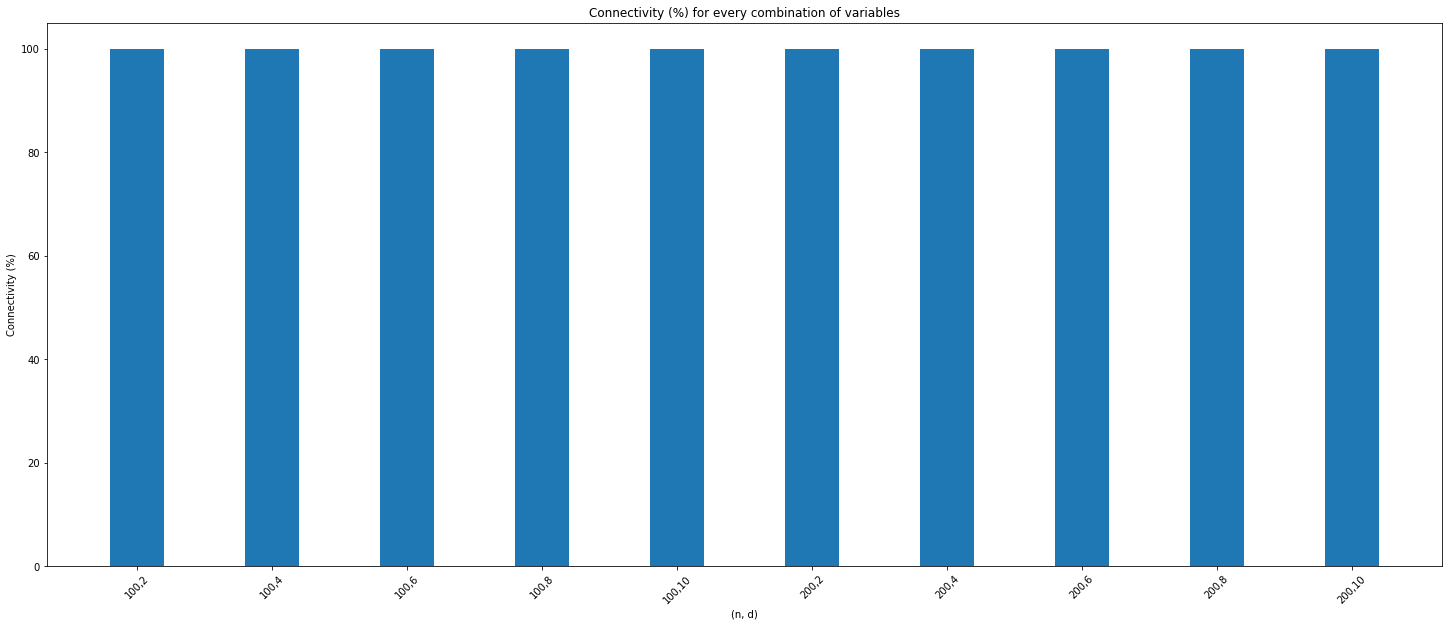

In [145]:
print("Connectivity SF")

connectivity_SF_data = {}

for n in range (100, 300, 100):
    for d in range (2, 12, 2):
        for i in range (0, 100):
            if nx.is_connected(nx.barabasi_albert_graph(n, d)):
                connectivity_SF_data[str(n) + "," + str(d)] = connectivity_SF_data.get(str(n) + "," + str(d), 0) + 1

printConnDistribution(connectivity_SF_data, "(n, d)")

Connectivity SW


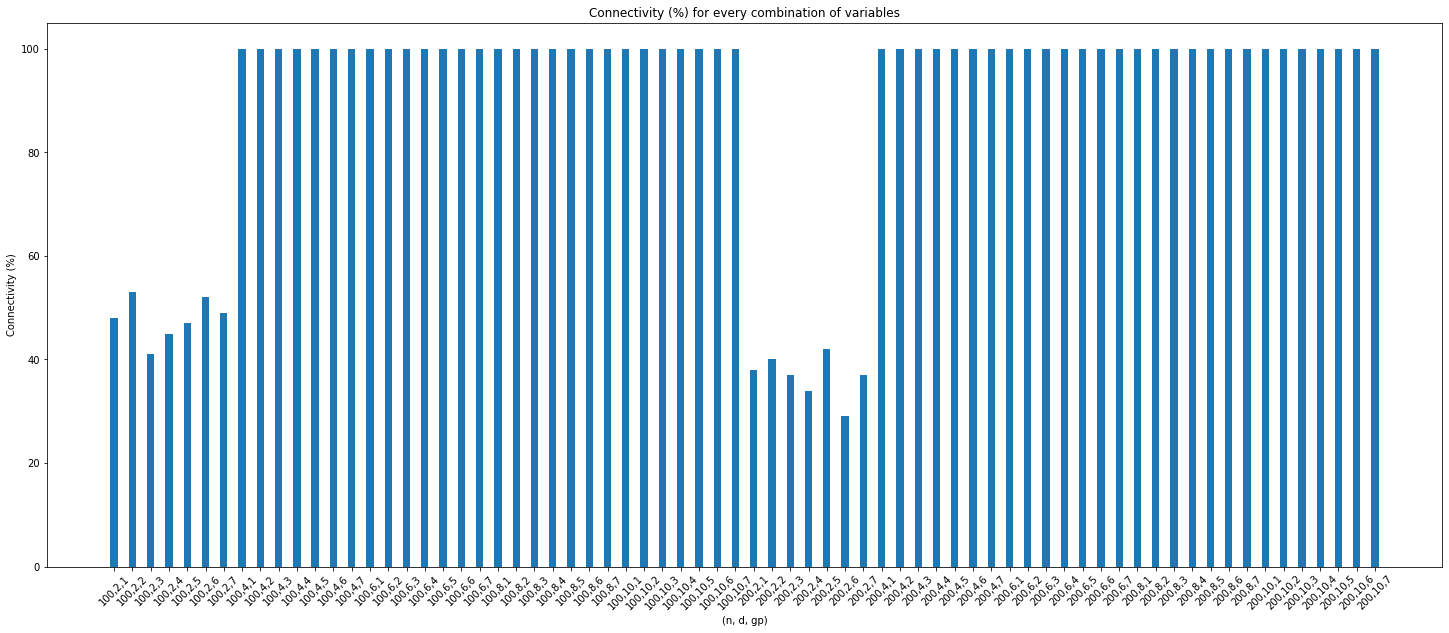

In [146]:
print("Connectivity SW")

connectivity_SW_data = {}

for n in range (100, 300, 100):
    for d in range (2, 12, 2):
        for gp in range (1, 8, 1):
            for i in range (0, 100):
                if nx.is_connected(nx.watts_strogatz_graph(n, d, gp)):
                    connectivity_SW_data[str(n) + "," + str(d) + "," + str(gp)] = connectivity_SW_data.get(str(n) + "," + str(d) + "," + str(gp), 0) + 1

printConnDistribution(connectivity_SW_data, "(n, d, gp)")

### Δ2. Μελέτη ευρωστίας δικτύου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS) που εξετάστηκαν στις ενότητες Β και Γ, να υπολογιστεί με τη συνάρτηση minimum_node_cut ο ελάχιστος αριθμός κόμβων που πρέπει να αφαιρεθούν για να προκύψει μη συνδεδεμένο δίκτυο. 
#### Να σχολιαστούν τα αποτελέσματα.

In [147]:
def find_cut(G):
    return nx.minimum_node_cut(G)

print("(D.2)")
for (g, name) in graph_pairs:
    cut = find_cut(g)
    print("To disconnect " + name + ":")
    print("\tThe minimum number of nodes that must be removed is:", len(cut))
    print("\tThe nodes that must be removed are:", cut)

(D.2)
To disconnect REG:
	The minimum number of nodes that must be removed is: 4
	The nodes that must be removed are: {0, 40, 37, 38}
To disconnect RGER:
	The minimum number of nodes that must be removed is: 2
	The nodes that must be removed are: {27, 4}
To disconnect RGG:
	The minimum number of nodes that must be removed is: 2
	The nodes that must be removed are: {28, 14}
To disconnect SF:
	The minimum number of nodes that must be removed is: 4
	The nodes that must be removed are: {0, 8, 26, 17}
To disconnect SW:
	The minimum number of nodes that must be removed is: 2
	The nodes that must be removed are: {29, 15}


### E) Μελέτη της εξελικτικής μετατροπής δικτύου REG σε δίκτυο SW και RGER

##### Μεταβάλλοντας την παράμετρο $g_p$ από $0$ έως $1$ με βήμα $0.1$ της συνάρτησης που κατασκευάζει τοπολογίες SW μεγέθους $n=30x$ ( αντικαταστήστε το x με το τελευταίο ψηφίο του ΑΜ) με βαθμό αρχικού πλέγματος $d=4$, να βρείτε το μέσο μήκος μονοπατιού και το μέσο συντελεστή ομαδοποίησης. Πώς συμπεριφέρεται το παραγόμενο δίκτυο για $g_p = 0$, πώς για $g_p = 1$ και πώς για ενδιάμεσες τιμές $g_p \simeq 0.1 - 0.5$;

In [148]:
random.seed(seedno)
n = 31
d = 4

### Z) Αναγνώριση τύπου πραγματικού δικτύου 
##### Για το πραγματικό δίκτυο που δίνεται στο αρχείο got.txt  και αφορά στις αλληλεπιδράσεις των χαρακτήρων του Game of Thrones στον πρώτο κύκλο επεισοδίων (https://github.com/mathbeveridge/gameofthrones) να βρεθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης και ο μέσος συντελεστής ομαδοποίησης.</li>
    <li>Το μέσο μήκος μονοπατιού.</li>
</ol>
<p style=text-align:justify>Να οπτικοποιηθεί το δίκτυο. Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο της τοπολογίας με βάση τους τύπους δικτύων που εξετάστηκαν στις ενότητες B, Γ.</p>

(Z.1)
	Mean Degree for SW: 0.06971428571428569
(Z.2)
	Average Clustering Coefficient is:  0.6296612631071081
(Z.3)
	Mean path length is: 2.826888756692445


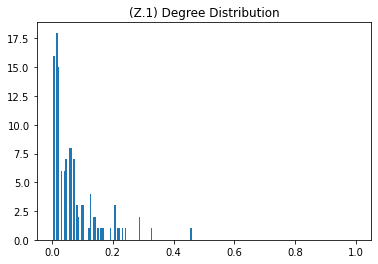

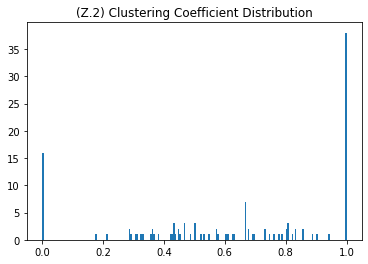

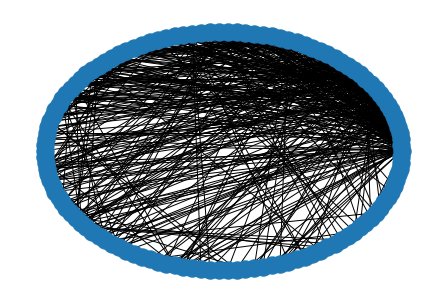

In [149]:
#read csv
import csv
G_got = nx.Graph() #the graph of the GOT characters
with open('got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    for row in csv_reader:
            G_got.add_edge(row[0], row[1], weight = row[2])
            line_count += 1

print("(Z.1)")
G_got_degree = find_degree(G_got)
# print(G_got_degree)
printDistrubtion(G_got_degree, "(Z.1) Degree Distribution", 200)
print("\tMean Degree for " + name + ":", np.mean(np.array(list(G_got_degree.values()))))

print("(Z.2)")
G_got_cc, G_got_avgcc = cc_and_avgcc(G_got)
printDistrubtion(G_got_cc, "(Z.2) Clustering Coefficient Distribution", 200)
# print("\tClustering Coefficient is: ", G_got_cc)
print("\tAverage Clustering Coefficient is: ", G_got_avgcc)

print("(Z.3)")
p = compute_path_lengths(G_got)
flattened_p = pd.json_normalize(paths, sep = "_").to_dict(orient = "records")[0]
print("\tMean path length is:", np.mean(np.array(list(flattened_p.values()))))

got_visualization = plt.figure()
nx.draw_circular(G_got)

#### Ποιοι ήταν οι 5 κεντρικότεροι χαρακτήρες του πρώτου κύκλου επεισοδίων ως προς το βαθμό, την εγγύτητα και την ενδιαμεσικότητα ? 

In [150]:
from collections import Counter

G_got_degree = find_degree(G_got)
top_5_degree = dict(Counter(G_got_degree).most_common(5))
print("Five most important characters of S1 as per degree:")
print(top_5_degree.keys())

G_got_closeness = find_closeness(G_got)
top_5_closeness = dict(Counter(G_got_closeness).most_common(5))
print("Five most important characters of S1 as per closeness:")
print(top_5_closeness.keys())

G_got_betweenness = find_betweenness(G_got)
top_5_betweenness = dict(Counter(G_got_betweenness).most_common(5))
print("Five most important characters of S1 as per betweenness:")
print(top_5_betweenness.keys())

Five most important characters of S1 as per degree:
dict_keys(['NED', 'TYRION', 'ROBERT', 'CATELYN', 'ROBB'])
Five most important characters of S1 as per closeness:
dict_keys(['NED', 'ROBERT', 'CATELYN', 'TYRION', 'JON'])
Five most important characters of S1 as per betweenness:
dict_keys(['NED', 'TYRION', 'CATELYN', 'ROBERT', 'DAENERYS'])
